In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

In [2]:
resultsNOBG = pd.read_csv('../Classification/All-NoBG-All.csv', sep=',')
#resultsNOBG = pd.read_csv('../Mahalonobis/All-NoBG-All.csv', sep=',')
#resultsCropped = pd.read_csv('../Classification/All-Cropped-All.csv', sep=',')
#resultsSolar= pd.read_csv('../Classification/All-Solar Data-All.csv', sep=',')
#type(results)

In [3]:
resultsNOBG['Train Acc'] = resultsNOBG['Train Acc'] *100
resultsNOBG['Test Acc'] = resultsNOBG['Test Acc'] *100
del resultsNOBG["Confusion Matrix"]
del resultsNOBG["Params"]
#resultsSolar['Train Acc'] = resultsSolar['Train Acc'] *100
#resultsSolar['Test Acc'] = resultsSolar['Test Acc'] *100
#del resultsSolar["Confusion Matrix"]
#del resultsSolar["Params"]
#resultsCropped['Train Acc'] = resultsCropped['Train Acc'] *100
#resultsCropped['Test Acc'] = resultsCropped['Test Acc'] *100
#del resultsCropped["Confusion Matrix"]
#del resultsCropped["Params"]

In [25]:
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

from matplotlib import rcParams
rcParams['axes.titlepad'] = 4 
rcParams['xtick.labelsize'] = 10
#rcParams.keys()


In [5]:
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [6]:
resultsNOBG.head()

,Classifier,Count,Cycle,Split,Train Acc,Test Acc,F1 Score,Train Time (ms),clfs per ms
0,KNN,Full (46),0,0,100.0,97.122302,5.839652,52.550960,97.696003
1,KNN,Full (46),0,1,100.0,97.661871,5.862115,53.849888,129.476273
2,KNN,Full (46),0,2,100.0,97.297297,5.852845,53.398037,129.495029
3,KNN,Full (46),0,3,100.0,97.477477,5.853524,55.999303,131.224977
4,KNN,Full (46),0,4,100.0,96.036036,5.770827,56.299090,129.490218


In [7]:
xxx = resultsNOBG.groupby(['Classifier','Count']).sum()-resultsNOBG.groupby(['Classifier','Count']).max()-resultsNOBG.groupby(['Classifier','Count']).min()

In [8]:
#print(xxx/48)

In [9]:
allresults = resultsNOBG.groupby(['Classifier','Count']).min().unstack(0)

In [10]:
allresults

Cycle           Split           Train Acc             ...  \
Classifier   KNN NN RF SVM   KNN NN RF SVM       KNN         NN  ...   
Count                                                            ...   
10             0  0  0   0     0  0  0   0     100.0  88.327316  ...   
20             0  0  0   0     0  0  0   0     100.0  96.091401  ...   
30             0  0  0   0     0  0  0   0     100.0  97.493483  ...   
40             0  0  0   0     0  0  0   0     100.0  97.813879  ...   
Full (46)      0  0  0   0     0  0  0   0     100.0  97.934216  ...   

            F1 Score           Train Time (ms)                           \
Classifier        RF       SVM             KNN           NN          RF   
Count                                                                     
10          5.441937  5.592240       16.949868  7611.097312  466.948628   
20          5.673354  5.843058       24.599433  7922.699666  576.899266   
30          5.612474  5.859278       35.449195  6753.350520  700.399303   
40          5.723073  5.866782       45.050335  6488.648629  844.348693   
Full (46)   5.728605  5.841507       51.498699  6319.700193  852.799582   

                        clfs per ms                                      
Classifier          SVM         KNN          NN          RF         SVM  
Count                                                                    
10          7204.912370  332.323726  712.094788  221.690673  255.643926  
20          2345.736235  181.311229  498.971854  127.908107  269.748600  
30          1825.036943   78.573916  383.754817   82.459038  153.399495  
40          1537.999105   71.741285  302.173156   61.949534  140.455095  
Full (46)   1425.436485   77.303357  664.784784  276.921036  178.131500  

[5 rows x 28 columns]

In [11]:
ax = sns.lineplot(x="Count", y="clfs per ms",hue = "Classifier",style = "Classifier", data=resultsNOBG)

NameError: name 'sns' is not defined

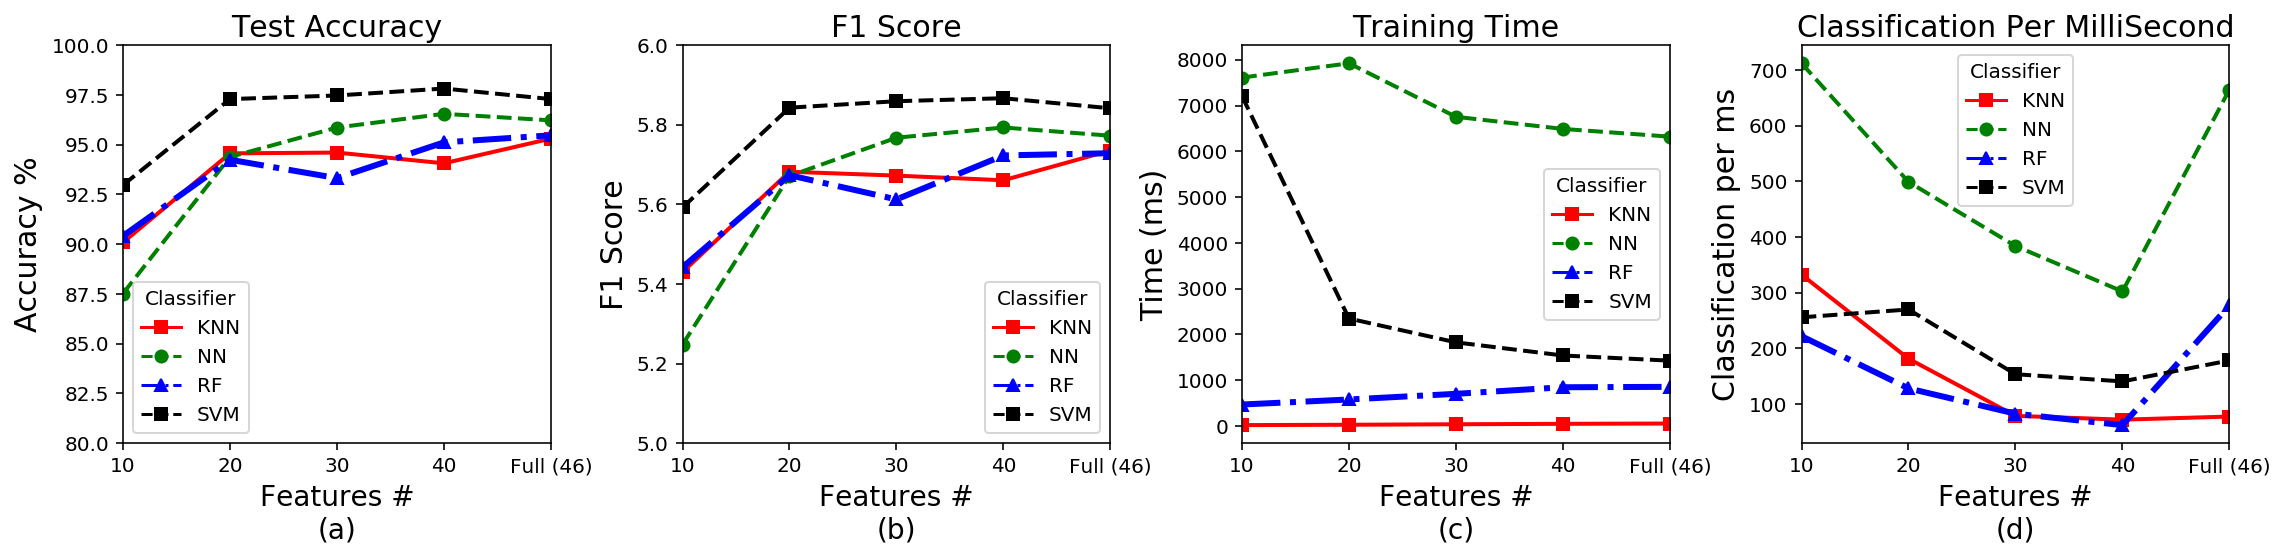

In [26]:
fig, axis = plt.subplots(ncols=4,figsize=(16,4)) 
plt.tight_layout(pad=3.4, w_pad=3.5, h_pad=6)

colors = ['red', 'g', 'blue', 'black']
styles=['rs-', 'go--', 'b^-.','ks--']
linewidths = [2, 2, 3,2]

bplota = allresults.plot(ax = axis[0], y='Test Acc',style=styles)
bplotb = allresults.plot(ax = axis[1], y='F1 Score',style=styles)
bplotd = allresults.plot(ax = axis[2], y='Train Time (ms)',style=styles)
bplote = allresults.plot(ax = axis[3], y='clfs per ms',style=styles)




#fig.texts = [] #flush the old super titles
#plt.suptitle('') 

axis[0].set_title('Test Accuracy',fontsize=15)
axis[0].set_ylabel('Accuracy %',fontsize=15)
axis[0].set_ylim(80,100)
axis[1].set_title('F1 Score',fontsize=15)
axis[1].set_ylabel('F1 Score',fontsize=15)
axis[1].set_ylim(5,6)
axis[2].set_title('Training Time',fontsize=15)
axis[2].set_ylabel('Time (ms)',fontsize=15)
#axis[1][0].set_ylim(0.5,2)
axis[3].set_title('Classification Per MilliSecond',fontsize=15)
axis[3].set_ylabel('Classification per ms',fontsize=15)
#axis[1][1].set_ylim(10,25)
#will add SLA % and Communicated Size
labels = ["Features #\n(a)",'Features #\n(b)','Features #\n(c)',"Features #\n(d)"]
for (n), axes in np.ndenumerate(axis):
    axes.set_xlabel(labels[n[0]],fontsize=14)
    #axes.legend_.remove()
    for tick in axes.get_xticklabels():
        tick.set_rotation(0)
    for i, l in enumerate(axes.lines):
        plt.setp(l, linewidth=linewidths[i])
fig.savefig('NoBGPvsF.png', dpi=300, bbox_inches='tight', transparent=True)

In [22]:
copy = resultsNOBG.copy().mean()
#copy = copy[copy['Count']=='10'].groupby(['Classifier']).std()
copy

Cycle                2.000000
Split                4.500000
Train Acc          100.000000
Test Acc            85.507858
F1 Score             5.149087
Train Time (ms)     23.872815
clfs per ms         23.582346
dtype: float64

In [16]:
copy = resultsCropped.copy()
copy = copy[copy['Count']=='10'].groupby(['Classifier']).mean()
copy.head(5)

NameError: name 'resultsCropped' is not defined

In [16]:
Solar = resultsSolar.copy()
Solar = Solar[Solar['Count']=='10'].groupby(['Classifier']).mean()
Solar.head(5)

,Cycle,Split,Train Acc,Test Acc,F1 Score,Train Time (ms),clfs per ms
Classifier,,,,,,,
KNN,2.0,4.5,100.000000,96.015124,5.775324,30.798471,478.465889
NN,2.0,4.5,94.740583,92.982027,5.606416,16047.237592,1407.956692
RF,2.0,4.5,99.979564,94.302734,5.682390,949.618735,480.897270
SVM,2.0,4.5,98.418482,96.826166,5.825500,22166.633401,306.792843


In [12]:
allSolarresults = resultsSolar.groupby(['Classifier','Count']).mean().unstack(0)
fig, axis = plt.subplots(nrows=2, ncols=2,figsize=(16,10)) 
plt.tight_layout(pad=3.4, w_pad=3.5, h_pad=6)

colors = ['red', 'g', 'blue', 'black']
styles=['rs-', 'go--', 'b^-.','ks--']
linewidths = [2, 2, 3,2]


bplota = allSolarresults.plot(ax = axis[0][0], y='Test Acc',style=styles)
bplotb = allSolarresults.plot(ax = axis[0][1], y='F1 Score',style=styles)
bplotd = allSolarresults.plot(ax = axis[1][0], y='Train Time (ms)',style=styles)
bplote = allSolarresults.plot(ax = axis[1][1], y='clfs per ms',style=styles)




fig.texts = [] #flush the old super titles
plt.suptitle('') 

axis[0][0].set_title('Test Accuracy',fontsize=15)
axis[0][0].set_ylabel('Accuracy %',fontsize=15)
axis[0][0].set_ylim(80,100)
axis[0][1].set_title('F1 Score',fontsize=15)
axis[0][1].set_ylabel('F1 Score',fontsize=15)
axis[0][1].set_ylim(5,6)
axis[1][0].set_title('Training Time',fontsize=15)
axis[1][0].set_ylabel('Time (ms)',fontsize=15)
#axis[1][0].set_ylim(0.5,2)
axis[1][1].set_title('Classification Per MilliSecond',fontsize=15)
axis[1][1].set_ylabel('Classification per ms',fontsize=15)
#axis[1][1].set_ylim(10,25)
#will add SLA % and Communicated Size
labels = [["(a)",'(b)'],['(c)',"(d)"]]
for (n_row, n_col), axes in np.ndenumerate(axis):
    axes.set_xlabel(labels[n_row][n_col],fontsize=15)
    #axes.legend_.remove()
    for tick in axes.get_xticklabels():
        tick.set_rotation(0)
    for i, l in enumerate(axes.lines):
        plt.setp(l, linewidth=linewidths[i])
fig.savefig('Solar DataPvsF.png', dpi=300, bbox_inches='tight', transparent=True)

NameError: name 'resultsSolar' is not defined

In [13]:
#Cropped
allresultsCropped = resultsCropped.groupby(['Classifier','Count']).mean().unstack(0)
fig, axis = plt.subplots(nrows=2, ncols=2,figsize=(16,10)) 
plt.tight_layout(pad=3.4, w_pad=3.5, h_pad=6)

colors = ['red', 'g', 'blue', 'black']
styles=['rs-', 'go--', 'b^-.','ks--']
linewidths = [2, 2, 3,2]


bplota = allresultsCropped.plot(ax = axis[0][0], y='Test Acc',style=styles)
bplotb = allresultsCropped.plot(ax = axis[0][1], y='F1 Score',style=styles)
bplotd = allresultsCropped.plot(ax = axis[1][0], y='Train Time (ms)',style=styles)
bplote = allresultsCropped.plot(ax = axis[1][1], y='clfs per ms',style=styles)




fig.texts = [] #flush the old super titles
plt.suptitle('') 

axis[0][0].set_title('Test Accuracy',fontsize=15)
axis[0][0].set_ylabel('Accuracy %',fontsize=15)
axis[0][0].set_ylim(80,100)
axis[0][1].set_title('F1 Score',fontsize=15)
axis[0][1].set_ylabel('F1 Score',fontsize=15)
axis[0][1].set_ylim(5,6)
axis[1][0].set_title('Training Time',fontsize=15)
axis[1][0].set_ylabel('Time (ms)',fontsize=15)
#axis[1][0].set_ylim(0.5,2)
axis[1][1].set_title('Classification Per MilliSecond',fontsize=15)
axis[1][1].set_ylabel('Classification per ms',fontsize=15)
#axis[1][1].set_ylim(10,25)
#will add SLA % and Communicated Size
labels = [["(a)",'(b)'],['(c)',"(d)"]]
for (n_row, n_col), axes in np.ndenumerate(axis):
    axes.set_xlabel(labels[n_row][n_col],fontsize=15)
    #axes.legend_.remove()
    for tick in axes.get_xticklabels():
        tick.set_rotation(0)
    for i, l in enumerate(axes.lines):
        plt.setp(l, linewidth=linewidths[i])
#fig.savefig('Solar DataPvsF.png', dpi=300, bbox_inches='tight', transparent=True)

NameError: name 'resultsCropped' is not defined

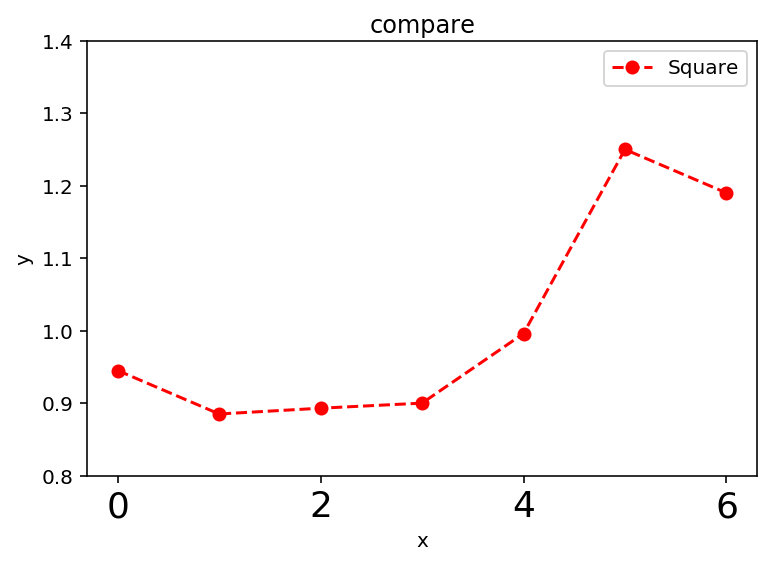

In [14]:
import matplotlib.pyplot as plt
x = [0.00001,0.001,0.01,0.1,0.5,1,5]
# create an index for each tick position
xi = [i for i in range(0, len(x))]
y = [0.945,0.885,0.893,0.9,0.996,1.25,1.19]
plt.ylim(0.8,1.4)
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xlabel('x')
plt.ylabel('y') 
#plt.xticks(xi, x)
plt.title('compare')
plt.legend() 
plt.show()